In [21]:
import numpy as np
import pandas as pd

import matplotlib .pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [22]:
from google.colab import files

uploaded = files.upload()

Saving loan_approval_dataset (1).csv to loan_approval_dataset (1).csv


In [23]:
import io
import pandas as pd

file_name = 'loan_approval_dataset (1).csv'
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [24]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1CuzFquWtE66Dzjw7Z23R5gDx30RBGz1wcbTj_QNIr2k/edit#gid=0


In [25]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/13lgwavWqYDAoByX3T_3w38FuA50FVZ8zIlBymq04fgo/edit#gid=0


In [26]:
df.tail(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [28]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [29]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [30]:
df.columns = df.columns.str.strip()


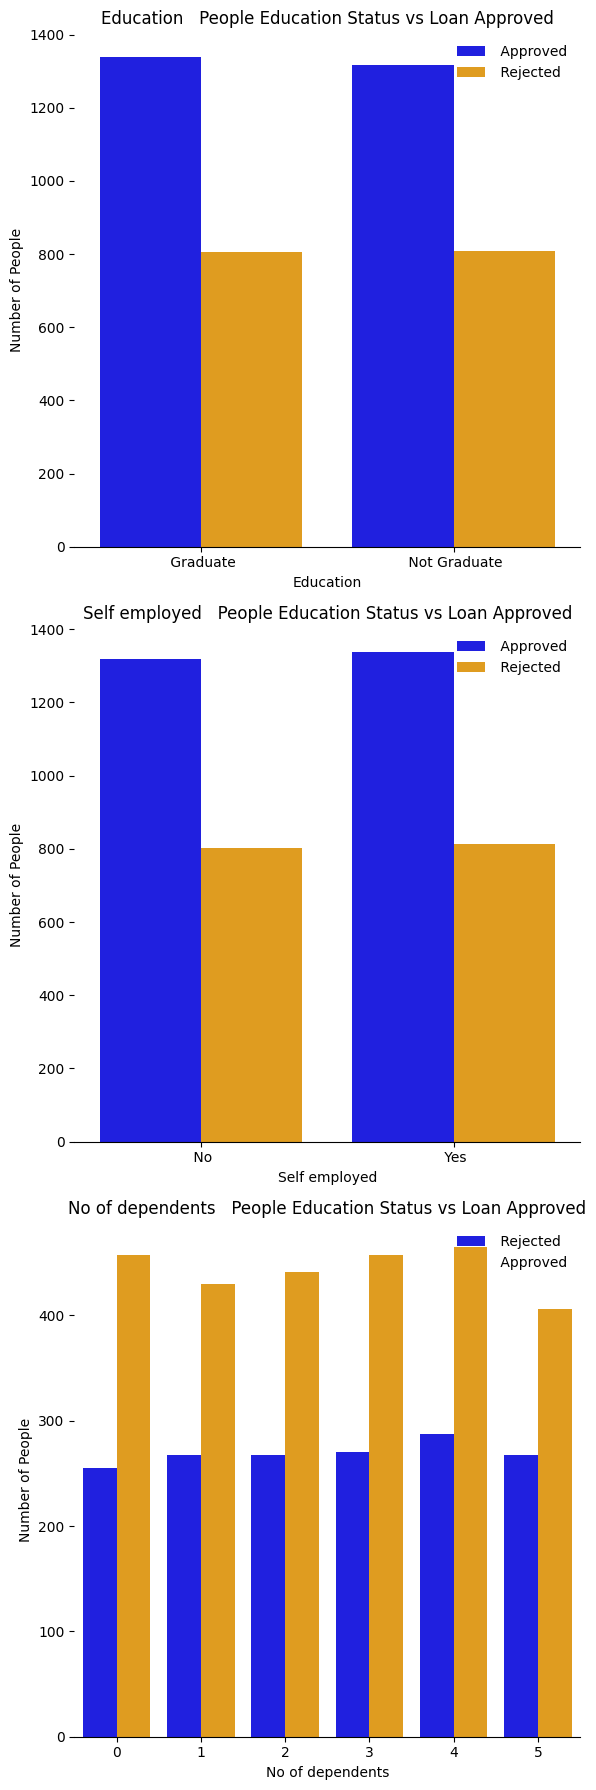

In [31]:

cat_cols = ['education', 'self_employed', 'no_of_dependents']
fig, axs = plt.subplots(3, 1, figsize=(6, 18))

for i, col in enumerate(cat_cols):
    ax = sns.countplot(x=col, data=df, hue='loan_status', ax=axs[i], palette = ["blue", "orange"])
    ax.set_title(f"{col.replace('_', ' ').capitalize()}   People Education Status vs Loan Approved")
    ax.set_xlabel(f"{col.replace('_', ' ').capitalize()}")
    ax.set_ylabel("Number of People")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.legend(frameon=False)

plt.tight_layout()
plt.show()

In [32]:
df.columns


Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

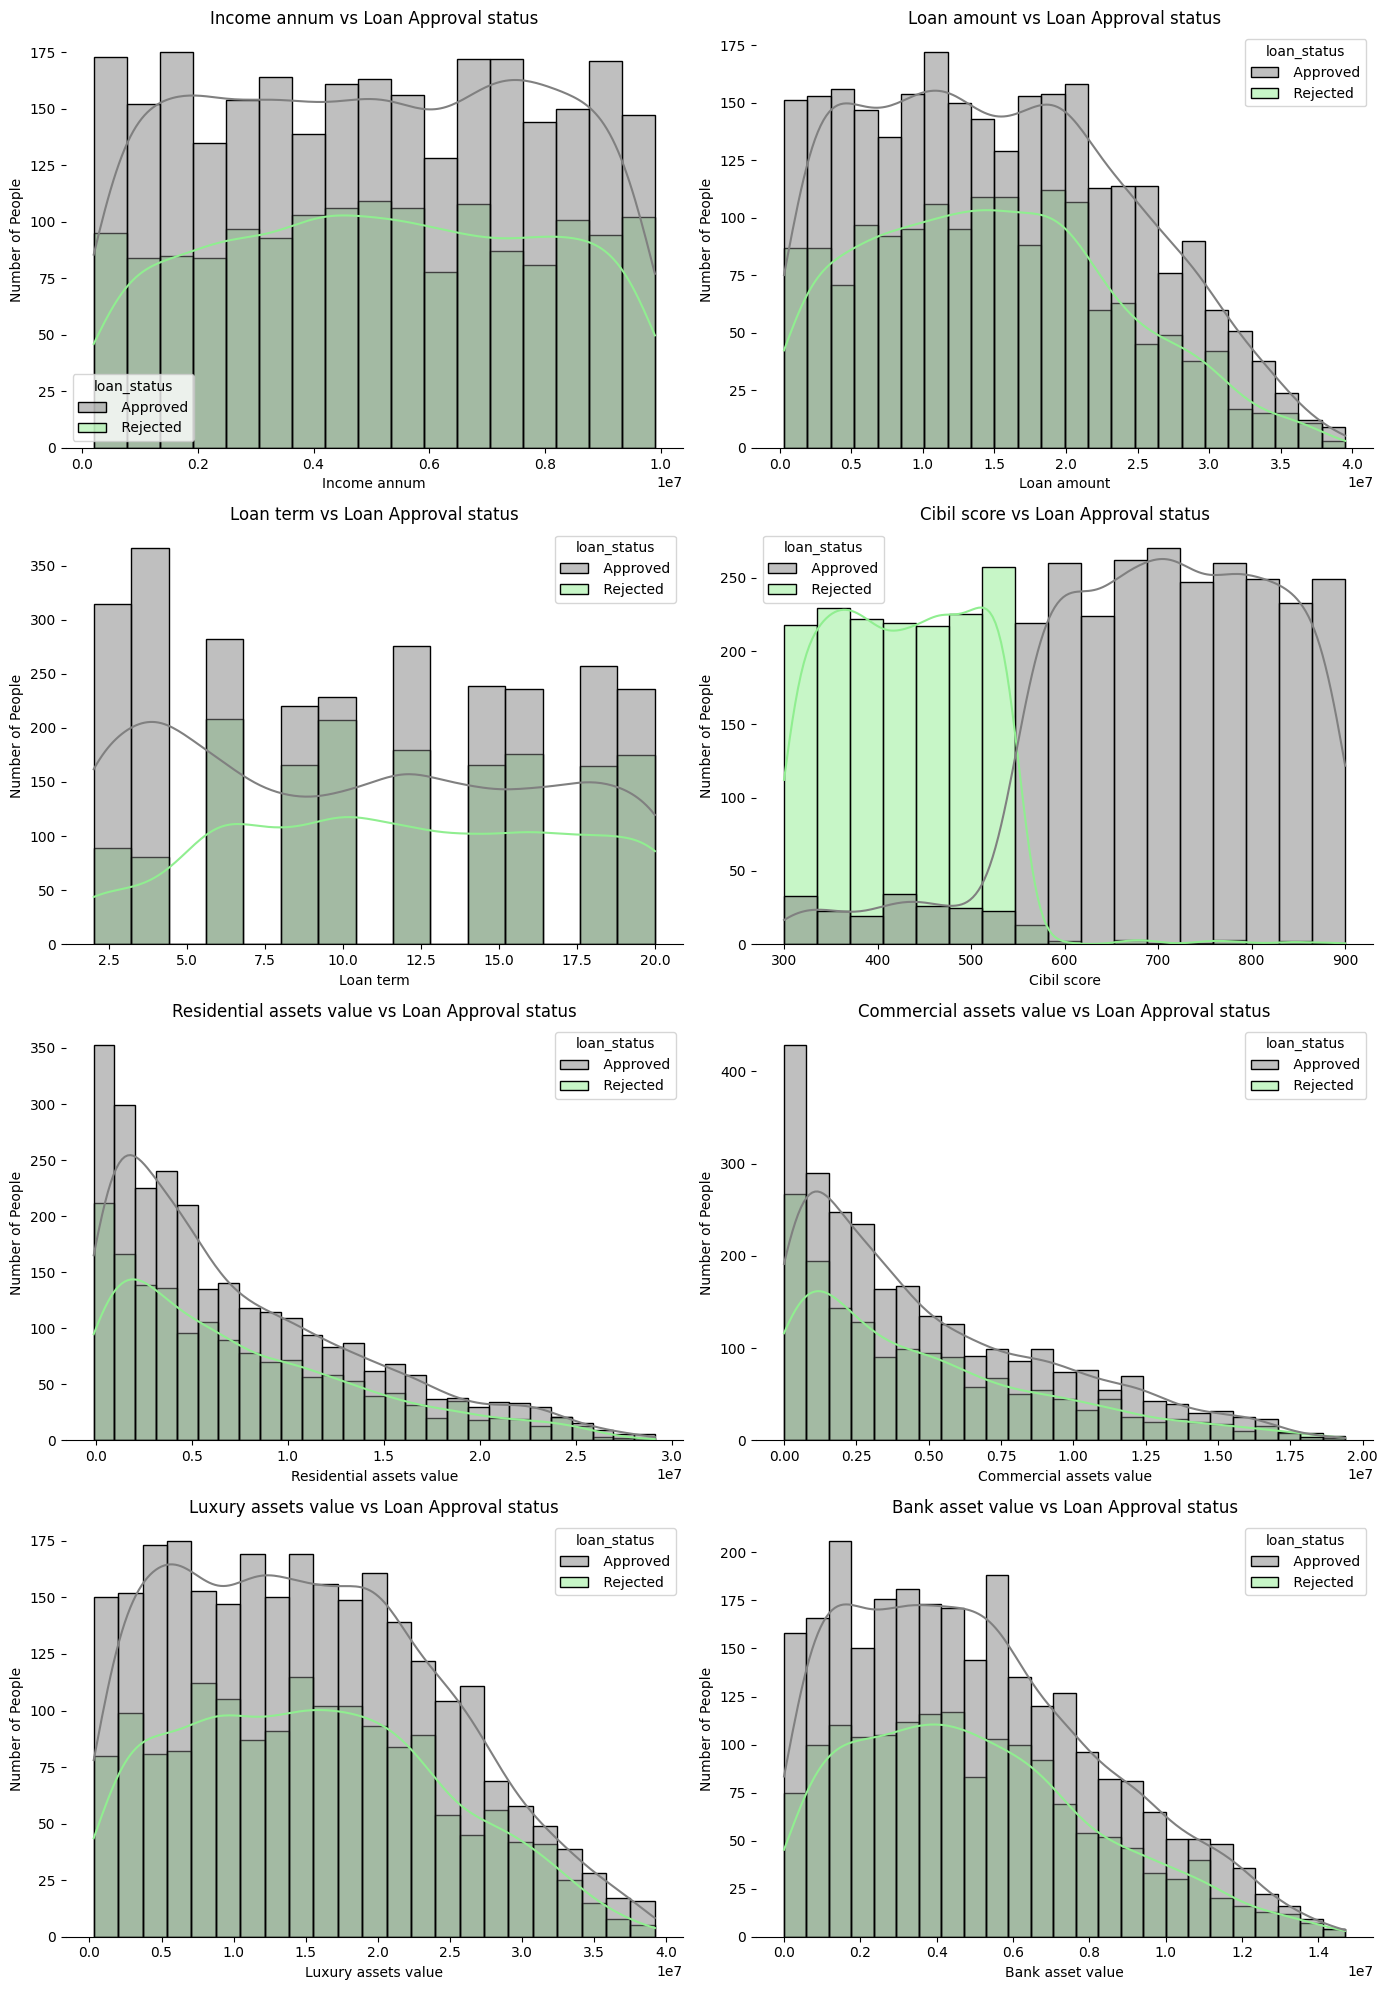

In [33]:

num_cols = ['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
            'residential_assets_value', 'commercial_assets_value',
            'luxury_assets_value', 'bank_asset_value']

fig, axs = plt.subplots(4, 2, figsize=(14, 20))

axs = axs.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, hue='loan_status', kde=True, ax=axs[i], palette=['gray', 'lightgreen'])
    axs[i].set_title(f"{col.replace('_', ' ').capitalize()} vs Loan Approval status")
    axs[i].set_xlabel(f"{col.replace('_', ' ').capitalize()}")
    axs[i].set_ylabel("Number of People")
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    handles, labels = axs[i].get_legend_handles_labels()
    if handles:
        axs[i].legend(handles=handles, labels=labels, frameon=False)


plt.tight_layout()
plt.show()

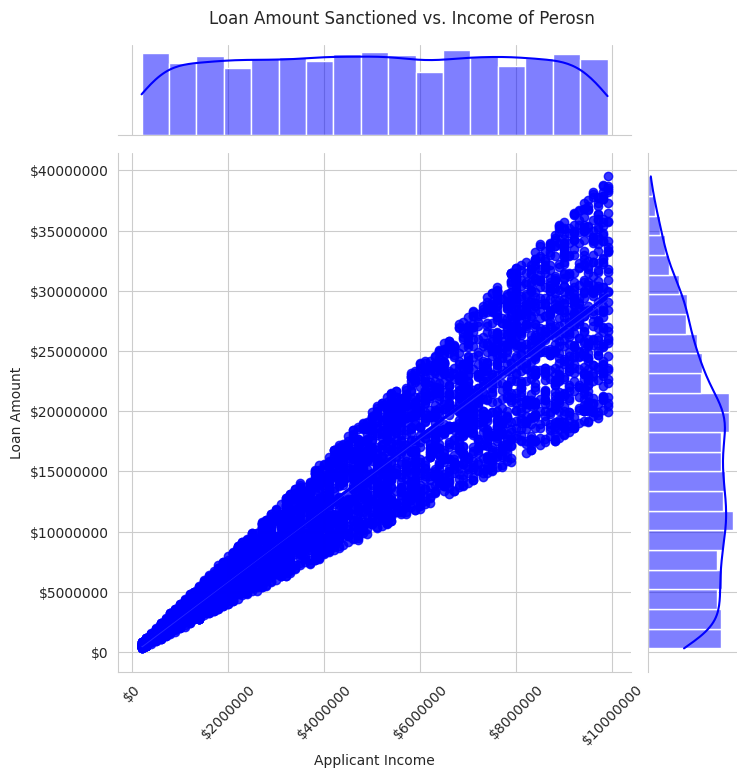

In [34]:

sns.set_style("whitegrid")
jointplot = sns.jointplot(data=df, x="income_annum", y="loan_amount",
                          height=7, kind="reg", color="blue")
jointplot.ax_joint.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '${:.0f}'.format(x)))
jointplot.ax_joint.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '${:.0f}'.format(y)))
jointplot.ax_joint.tick_params(axis='x', rotation=45)
jointplot.set_axis_labels(xlabel="Applicant Income", ylabel="Loan Amount")
jointplot.fig.suptitle("Loan Amount Sanctioned vs. Income of Perosn", y=1.03)
plt.show()

In [35]:
df.head(8)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected


In [36]:

df.drop(["loan_id"], axis=1, inplace=True)

In [37]:

cat_cols = ['education', 'self_employed', 'loan_status']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

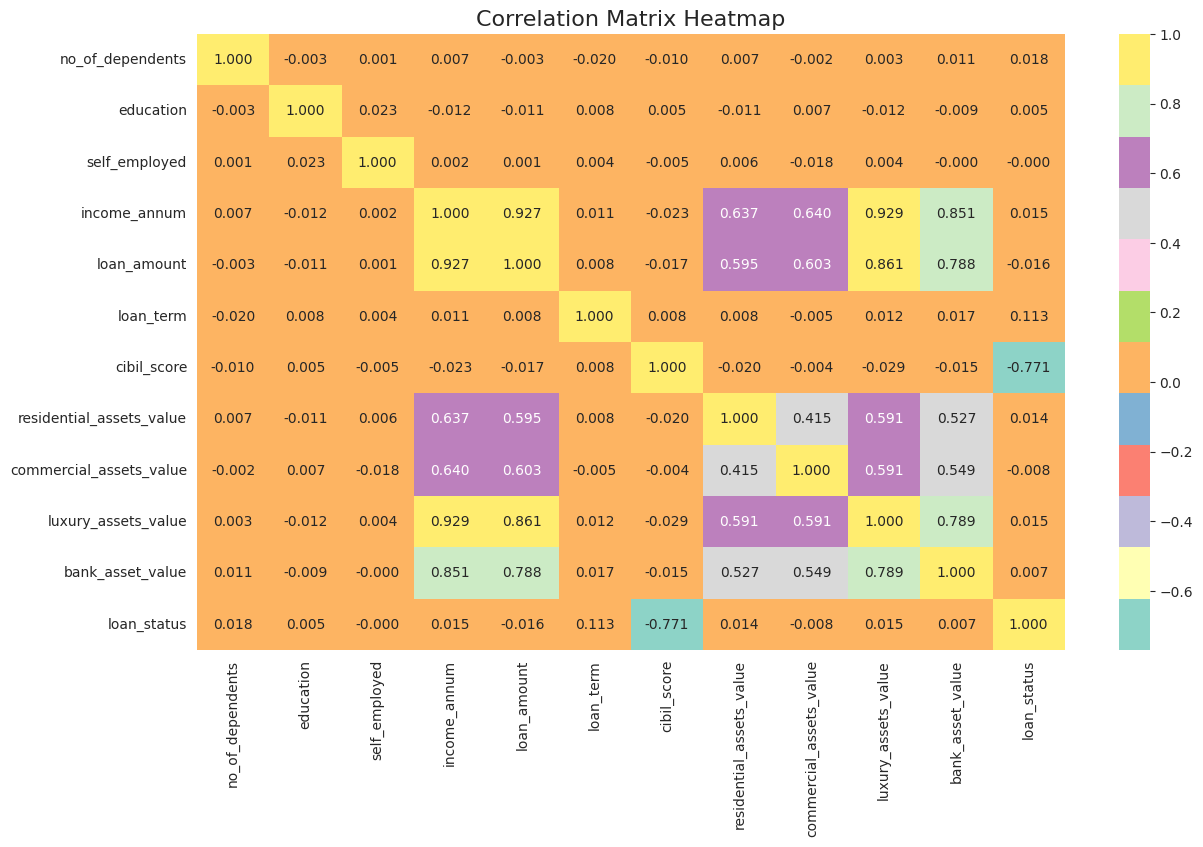

In [38]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, fmt=".3f",cmap="Set3")
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

In [39]:
df.corr()["loan_status"].sort_values(ascending = False)


,loan_status
loan_status,1.000000
loan_term,0.113036
no_of_dependents,0.018114
luxury_assets_value,0.015465
income_annum,0.015189
residential_assets_value,0.014367
bank_asset_value,0.006778
education,0.004918
self_employed,-0.000345
commercial_assets_value,-0.008246


In [40]:
X = df[["cibil_score"]]
y = df[["loan_status"]]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [42]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Epoch 1/10
--------------------------------------------------------------------------------
Model: Decision Tree Classifier (Epoch 1)
Accuracy: 0.939
Precision: 0.886
Recall: 0.967
F1-score: 0.925
AUC: 0.944
------------------------------------------------------------------------------------------------------------------------
Epoch 2/10
--------------------------------------------------------------------------------
Model: Decision Tree Classifier (Epoch 2)
Accuracy: 0.939
Precision: 0.886
Recall: 0.967
F1-score: 0.925
AUC: 0.944
------------------------------------------------------------------------------------------------------------------------
Epoch 3/10
--------------------------------------------------------------------------------
Model: Decision Tree Classifier (Epoch 3)
Accuracy: 0.939
Precision: 0.886
Recall: 0.967
F1-score: 0.925
AUC: 0.944
------------------------------------------------------------------------------------------------------------------------
Epoch 4/10
--

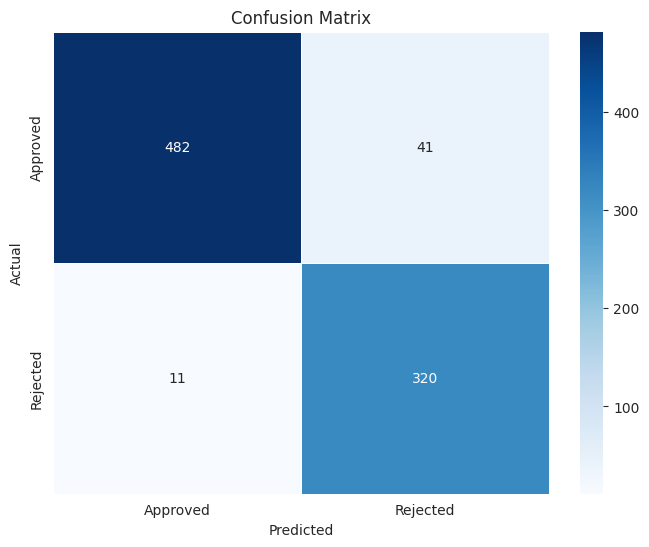

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

decision_tree = DecisionTreeClassifier()

epochs = 10
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")

    decision_tree.fit(X_train_scaled, y_train)

    y_pred = decision_tree.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)

    print('-' * 80)
    print(f'Model: Decision Tree Classifier (Epoch {epoch + 1})')
    print(f'Accuracy: {acc:.3f}')
    print(f'Precision: {precision:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'F1-score: {f1:.3f}')
    print(f'AUC: {auc_score:.3f}')
    print('-' * 120)
print("Final Evaluation on Test Data:")
print(f"The Accuracy Score: {acc:.3f}\n")
print(classification_report(y_test, y_pred))

print("\t\t\tConfusion Matrix")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), fmt=".0f", annot=True, linewidths=0.5, cmap='Blues',
            xticklabels=["Approved", "Rejected"], yticklabels=["Approved", "Rejected"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


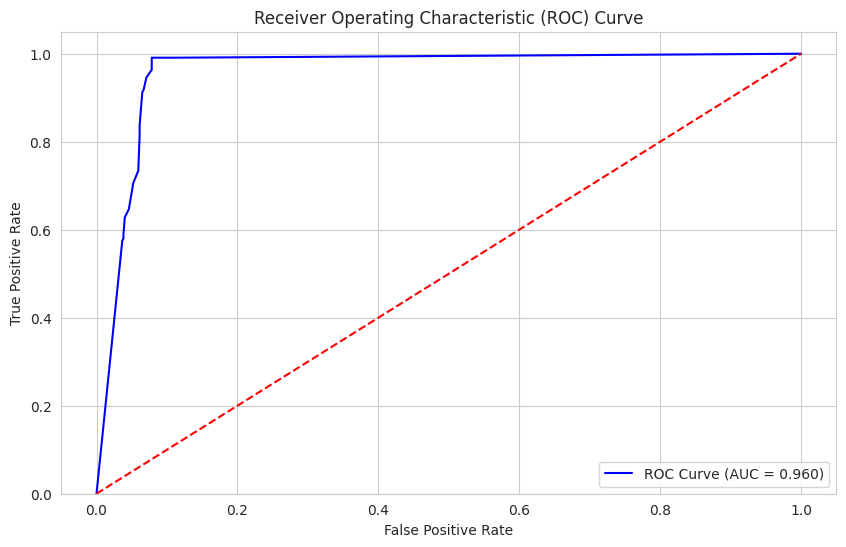

In [44]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = decision_tree.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
